In [119]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Use weight-hight data in .csv file
WeightHeightDataPath = 'weight-height.csv'

In [62]:
WeightHightData = pd.read_csv(WeightHeightDataPath) 

In [121]:
# data is a DataFrame
type(WeightHightData)

pandas.core.frame.DataFrame

In [122]:
# Top 5 entries
WeightHightData.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [123]:
# bottom 5 entries
WeightHightData.tail()

,Gender,Height,Weight
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461
9999,1,61.944246,113.649103


In [124]:
# Numbers of rows and columns in DataFrame
WeightHightData.shape

(10000, 3)

In [125]:
# Drop rows with missing data values
WeightHightData = WeightHightData.dropna(axis=0)

In [126]:
WeightHightData.shape

(10000, 3)

In [127]:
# It turns out there is no missing data!
WeightHightData.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


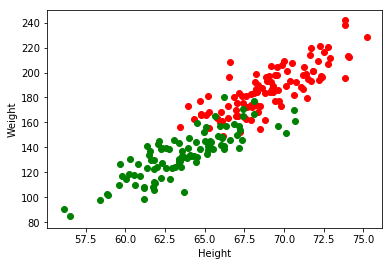

In [128]:
# Have mean, std, max, min and so on of height and weight columns. 
# Can also get an initial idea of what the data looks like by plotting a scatter plot of weight v height
# red dots are male, green are female
i = WeightHightData['Height']
j = WeightHightData['Weight']
male = i[0:100]
female = i[5001:5101]
wm = j[0:100]
wf = j[5001:5101]
plt.scatter(male,wm, color='r')
plt.scatter(female,wf,color='g')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [129]:
# Column 'Gender' is categorial - not easy to put into machine learning algorithms like Linear Regression. 
# So change 'Male' to 0 and 'Female' to 1
WeightHightData = WeightHightData.replace('Male','0')
WeightHightData = WeightHightData.replace('Female','1')
WeightHightData.sample(10)

,Gender,Height,Weight
336,0,69.692422,211.718429
1496,0,69.633162,189.651557
6639,1,62.730459,110.242111
3869,0,66.324954,166.615538
3873,0,65.641749,156.288168
747,0,65.440922,144.132027
8439,1,66.559796,162.676838
8925,1,65.923586,168.796481
1566,0,66.574887,163.241255
8248,1,60.179112,97.261313


In [130]:
WeightHightData.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [131]:
# Set feature columns
feature_columns = ['Height', 'Weight']

In [132]:
# Set features X and target y
X = WeightHightData[feature_columns]
y = WeightHightData.Gender

In [133]:
# Want to split the data into train and test for accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [134]:
# Begin by looking at Linear Regression model
from sklearn.linear_model import LinearRegression

In [135]:
reg = LinearRegression().fit(X_train, y_train)

In [136]:
# Intercept value 
reg.intercept_

0.5348592678368422

In [137]:
# Coefficient for the two variables 'Male' = 0 and 'Female' = 1
reg.coef_

array([ 0.04085285, -0.01699479])

In [150]:
linear_predictions = reg.predict(X_test)
linear_predictions

array([ 0.83227583,  0.09891919, -0.10068151, ...,  1.05913194,
        0.8104003 ,  0.67213455])

In [138]:
# So y = 0.5349 + 0.0409'Male' - 0.0169'Female'
# Goodness of fit - How well does the regression line above fit the training data?
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_train, reg.predict(X_train))
MSE

0.08676099840733661

In [158]:
# error in predictions
MSE = mean_squared_error(y_test, reg.predict(X_test))
MSE

0.08993268563674349

In [159]:
# R^2 score
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, reg.predict(X_train)), r2_score(y_test, reg.predict(X_test))))

R^2 train: 0.653, test: 0.640


In [161]:
# Now use KNN algorithm

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [164]:
prediction = knn.predict(X_test)
type(prediction)

numpy.ndarray

In [165]:
prediction

array(['1', '0', '0', ..., '1', '1', '1'], dtype=object)

In [166]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv=50, scoring='accuracy')
scores

array([0.94326241, 0.88652482, 0.90780142, 0.92198582, 0.87943262,
       0.88652482, 0.88652482, 0.87943262, 0.86524823, 0.92907801,
       0.92907801, 0.91428571, 0.96428571, 0.92142857, 0.89285714,
       0.92857143, 0.92857143, 0.89285714, 0.94285714, 0.91428571,
       0.93571429, 0.90714286, 0.88571429, 0.92142857, 0.91428571,
       0.91428571, 0.93571429, 0.93571429, 0.92142857, 0.93571429,
       0.9       , 0.9       , 0.93571429, 0.93571429, 0.85      ,
       0.93571429, 0.91428571, 0.94285714, 0.91428571, 0.92805755,
       0.91366906, 0.82014388, 0.90647482, 0.91366906, 0.94244604,
       0.94964029, 0.9352518 , 0.86330935, 0.94244604, 0.90647482])

In [167]:
scores.mean()

0.9134438127309703

In [168]:
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.913

In [169]:
knn_dict = {}

In [170]:
for i in range (2, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    knn_dict[i] = prediction

In [171]:
knn_dict

{2: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 3: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 4: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 5: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 6: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 7: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 8: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 9: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 10: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 11: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 12: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 13: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 14: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 15: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 16: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),
 17: array(['1', '0', '0', ..., '1', '1', '1'], dtype=object),


In [175]:
k_range = range(10,100)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

k_scores

[0.9137154752210865,
 0.9122864944622335,
 0.9134285352768942,
 0.9139997606409109,
 0.9145711892123396,
 0.912999760640911,
 0.9145711892123396,
 0.9147136381910984,
 0.9154283320694823,
 0.9145707810482412,
 0.9151422096196699,
 0.9149993524768126,
 0.9159999655975973,
 0.91628506792871,
 0.915856904664237,
 0.9158571090378318,
 0.9162860892135933,
 0.9151428227404544,
 0.916428538192352,
 0.9162856804664032,
 0.9164287413997638,
 0.9157144556854782,
 0.9162860892135933,
 0.9144291489807704,
 0.9157144562685697,
 0.9149997623901855,
 0.9161422119520359,
 0.9152856810494949,
 0.9157142524780664,
 0.9160001711373754,
 0.9162856816325865,
 0.9161424151594477,
 0.9165711915447059,
 0.915713844313968,
 0.9152854772589916,
 0.9152854766758999,
 0.9157142530611578,
 0.9161428239066378,
 0.9157144568516612,
 0.9158571096209235,
 0.9162856816325865,
 0.9165716002918955,
 0.9162854778420831,
 0.9159999667637806,
 0.9158573139945185,
 0.9167146606421646,
 0.91628588542309,
 0.9165715997088041,


Text(0,0.5,'Mean accuracy scores')

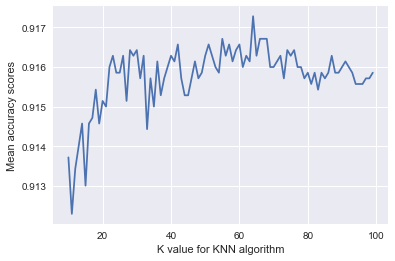

In [176]:
plt.plot(k_range, k_scores)

plt.xlabel('K value for KNN algorithm')
plt.ylabel('Mean accuracy scores')

In [177]:
# Choise of k for KNN was just to see what would happen. Here k~62 seems to be the optimal number of neighbours. 